In [443]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

#increase display width to view all columns at once
pd.options.display.width = 1200

#set paths for data
mouse_metadata_path = "/Users/bitty/matplotlib-challenge/matplotlib-challenge/Resources/Mouse_metadata.csv"
study_results_path = "/Users/bitty/matplotlib-challenge/matplotlib-challenge/Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#look at data
print(mouse_metadata)
print(study_results)



    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0       k403     Ramicane    Male          21          16
1       s185    Capomulin  Female           3          17
2       x401    Capomulin  Female          16          15
3       m601    Capomulin    Male          22          17
4       g791     Ramicane    Male          11          16
..       ...          ...     ...         ...         ...
244     z314     Stelasyn  Female          21          28
245     z435     Propriva  Female          12          26
246     z581    Infubinol  Female          24          25
247     z795     Naftisol  Female          13          29
248     z969     Naftisol    Male           9          30

[249 rows x 5 columns]
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0        b128          0           45.000000                 0
1        f932          0           45.000000                 0
2        g107          0           45.000000                 0
3        a457          0    

In [444]:
# Combine & Display the data table for preview
full_data_set = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')
full_data_set.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [445]:
# Checking the number of mice.
full_data_set.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [446]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = full_data_set.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [447]:
cleaned_data_set = full_data_set.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
cleaned_data_set.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [448]:
#get a clean duplicate count
cleaned_data_set.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

## Summary Statistics

In [449]:
print(cleaned_data_set["Drug Regimen"].unique())

['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']


In [450]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped_by_drug_regimen = cleaned_data_set.groupby("Drug Regimen")
print(grouped_by_drug_regimen.head())


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0       k403     Ramicane    Male          21          16          0           45.000000                 0
1       k403     Ramicane    Male          21          16          5           38.825898                 0
2       k403     Ramicane    Male          21          16         10           35.014271                 1
3       k403     Ramicane    Male          21          16         15           34.223992                 1
4       k403     Ramicane    Male          21          16         20           32.997729                 1
10      s185    Capomulin  Female           3          17          0           45.000000                 0
11      s185    Capomulin  Female           3          17          5           43.878496                 0
12      s185    Capomulin  Female           3          17         10           37.614948                 0
13      s185    Capomulin  Female    

In [451]:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
av_tumor_size_by_reg = pd.DataFrame(cleaned_data_set.groupby(["Drug Regimen"]).mean().round(2))
av_tumor_size_by_reg = av_tumor_size_by_reg.drop(columns=["Age_months", "Weight (g)", "Timepoint", "Metastatic Sites"])
print(av_tumor_size_by_reg)

#median
median_tumor_vol = pd.DataFrame(cleaned_data_set.groupby(["Drug Regimen"]).median().round(2))
median_tumor_vol = median_tumor_vol.drop(columns=["Age_months", "Weight (g)", "Timepoint", "Metastatic Sites"])
print(median_tumor_vol)

#standard dev
std_tumor_vol = pd.DataFrame(cleaned_data_set.groupby(["Drug Regimen"]).std().round(2))
std_tumor_vol = std_tumor_vol.drop(columns=["Age_months", "Weight (g)", "Timepoint", "Metastatic Sites"])
print(std_tumor_vol)

#SEM
sem_tumor_vol = pd.DataFrame(cleaned_data_set.groupby(["Drug Regimen"]).sem().round(2))
sem_tumor_vol = sem_tumor_vol.drop(columns=["Age_months", "Weight (g)", "Timepoint", "Metastatic Sites"])
print(sem_tumor_vol)

              Tumor Volume (mm3)
Drug Regimen                    
Capomulin                  40.68
Ceftamin                   52.59
Infubinol                  52.88
Ketapril                   55.24
Naftisol                   54.33
Placebo                    54.03
Propriva                   52.39
Ramicane                   40.22
Stelasyn                   54.23
Zoniferol                  53.24
              Tumor Volume (mm3)
Drug Regimen                    
Capomulin                  41.56
Ceftamin                   51.78
Infubinol                  51.82
Ketapril                   53.70
Naftisol                   52.51
Placebo                    52.29
Propriva                   50.91
Ramicane                   40.67
Stelasyn                   52.43
Zoniferol                  51.82
              Tumor Volume (mm3)
Drug Regimen                    
Capomulin                   4.99
Ceftamin                    6.27
Infubinol                   6.57
Ketapril                    8.28
Naftisol  

In [452]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#merge data
tumor_size_by_drug_summary = pd.merge(av_tumor_size_by_reg, median_tumor_vol, on="Drug Regimen")
tumor_size_by_drug_summary = tumor_size_by_drug_summary.rename(columns={"Tumor Volume (mm3)_x":"Mean Tumor Volume (mm3)", "Tumor Volume (mm3)_y":"Median Tumor Volume (mm3)"})

tumor_size_by_drug_summary = pd.merge(tumor_size_by_drug_summary, std_tumor_vol, on="Drug Regimen")
tumor_size_by_drug_summary = tumor_size_by_drug_summary.rename(columns={"Tumor Volume (mm3)":"Standard Deviation of Tumor Volume (mm3)"})

tumor_size_by_drug_summary = pd.merge(tumor_size_by_drug_summary, sem_tumor_vol, on="Drug Regimen")
tumor_size_by_drug_summary = tumor_size_by_drug_summary.rename(columns={"Tumor Volume (mm3)":"SEM of Tumor Volume (mm3)"})
print(tumor_size_by_drug_summary)

              Mean Tumor Volume (mm3)  Median Tumor Volume (mm3)  Standard Deviation of Tumor Volume (mm3)  SEM of Tumor Volume (mm3)
Drug Regimen                                                                                                                         
Capomulin                       40.68                      41.56                                      4.99                       0.33
Ceftamin                        52.59                      51.78                                      6.27                       0.47
Infubinol                       52.88                      51.82                                      6.57                       0.49
Ketapril                        55.24                      53.70                                      8.28                       0.60
Naftisol                        54.33                      52.51                                      8.13                       0.60
Placebo                         54.03                      52.

In [453]:
# Using the aggregation method, produce the same summary statistics in a single line
#????????????

## Bar and Pie Charts

In [454]:
#create dataframe 
drug_regimen_df = pd.DataFrame(cleaned_data_set["Drug Regimen"].value_counts())
drug_regimen_df

,Drug Regimen
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178
Propriva,156


<AxesSubplot:>

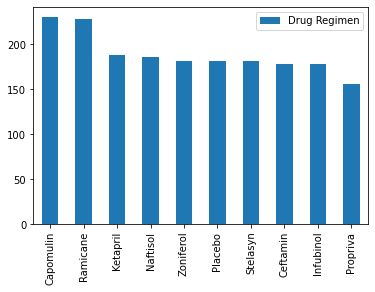

In [455]:
#Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_regimen_df.plot.bar(rot=90)

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     156
Name: Drug Regimen, dtype: int64


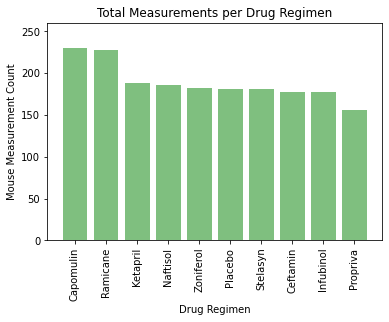

In [456]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_names = ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Placebo', 'Stelasyn', 'Ceftamin', 'Infubinol', 'Propriva']

#set y values
y_values = cleaned_data_set["Drug Regimen"].value_counts()
print(y_values)

plt.bar(drug_names, y_values, color='green', align='center', alpha=0.5)
labels = drug_names
plt.xticks(drug_names, labels, rotation='vertical')
plt.xlabel('Drug Regimen')
plt.ylim(0, max(y_values)+30)
plt.ylabel('Mouse Measurement Count')
plt.title('Total Measurements per Drug Regimen')
plt.show()

<AxesSubplot:title={'center':'Mouse Gender Proportion'}, ylabel='Sex'>

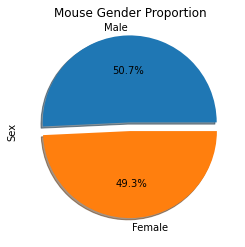

In [470]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_mice = cleaned_data_set["Sex"].value_counts()
explode = (0.1, 0)
gender_mice.plot.pie(title="Mouse Gender Proportion" ,explode=explode, autopct="%1.1f%%", shadow=True)

Male      958
Female    930
Name: Sex, dtype: int64


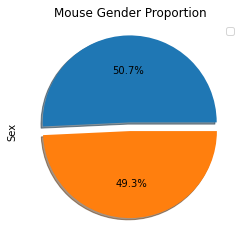

In [476]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_mice = cleaned_data_set["Sex"].value_counts()
print(gender_mice)
explode = (0.1, 0)
plt.title('Mouse Gender Proportion')
plt.ylabel('Sex')
plt.pie(gender_mice, explode=explode, autopct="%1.1f%%", shadow=True)
plt.show()



## Quartiles, Outliers and Boxplots

In [459]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [460]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [461]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [462]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [463]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [464]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
